# Testing of fetching album art

In [12]:
import album_art

# Import the album_art module and test embedding cover art

# Test with a sample artist and album
test_artist = "Brymir"
test_album = "Voices in the Sky"
test_mp3_path = "NeuralForge/songs/Melodic Death Metal/Brymir - Herald of Aegir.mp3"  # This would be your actual MP3 file path

[show] Loading ID3 from: NeuralForge/songs/Melodic Death Metal/Brymir - Herald of Aegir.mp3
[show] Found 1 APIC frame(s).
[show] Selected APIC type=PictureType.COVER_FRONT, MIME=image/jpeg
[show] Displaying image (format=jpeg, fixed width=400)...


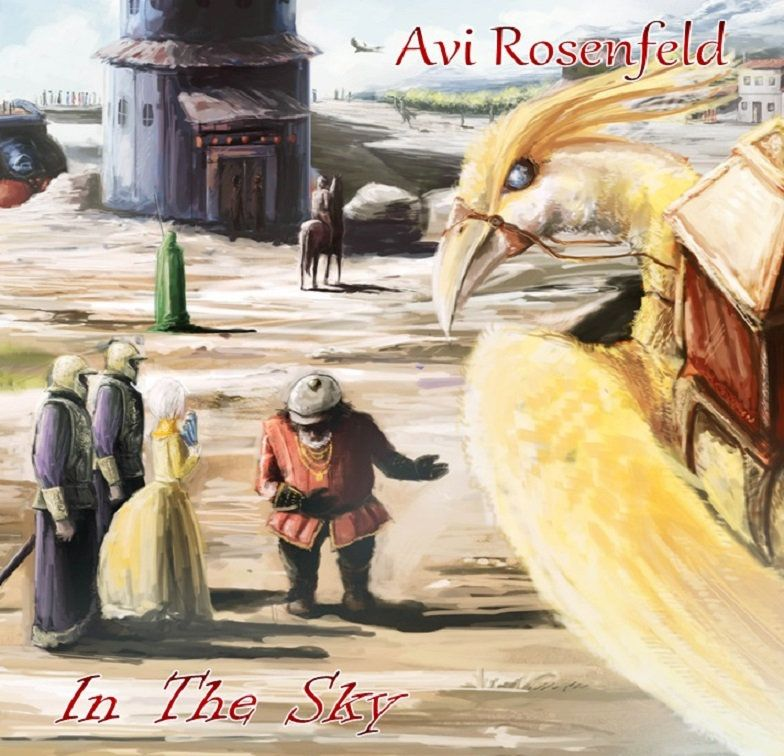

Saved embedded art to: /tmp/tmpwzdqfiu5.jpeg


'image/jpeg'

In [13]:
album_art.show_embedded_art(test_mp3_path)

In [14]:
print(f"Testing album art embedding for '{test_album}' by '{test_artist}'")
album_art.embed_from_artist_album(test_mp3_path, test_artist, test_album)

Testing album art embedding for 'Voices in the Sky' by 'Brymir'
Searching for album 'Voices in the Sky' by 'Brymir' on MusicBrainz...
-> Candidate release 'Voices in the Sky' (ID: 3d59992c-6506-4b4c-ac2b-8455d42c06e3) [score=173.0, date=2022-08-26, country=XE, sources=release-group,release-search, status=Official]
-> Successfully downloaded cover art from http://coverartarchive.org/release/3d59992c-6506-4b4c-ac2b-8455d42c06e3/33343256608.jpg
-> Successfully embedded artwork into 'NeuralForge/songs/Melodic Death Metal/Brymir - Herald of Aegir.mp3' (Release: 'Voices in the Sky')


[show] Loading ID3 from: NeuralForge/songs/Melodic Death Metal/Brymir - Herald of Aegir.mp3
[show] Found 1 APIC frame(s).
[show] Selected APIC type=PictureType.COVER_FRONT, MIME=image/jpeg
[show] Displaying image (format=jpeg, fixed width=400)...


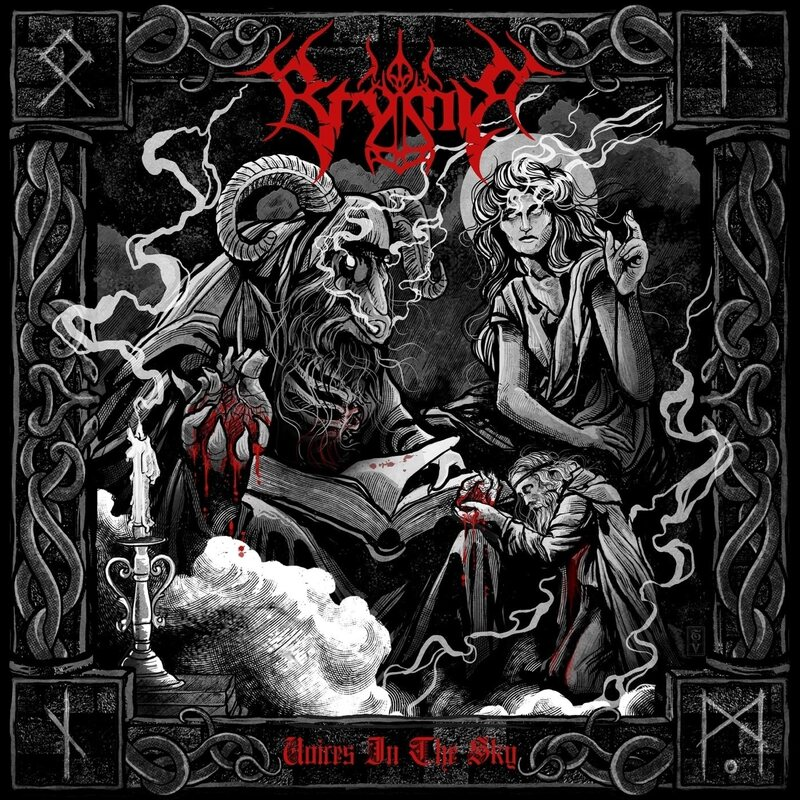

Saved embedded art to: /tmp/tmps6tc71zy.jpeg


'image/jpeg'

In [15]:
album_art.show_embedded_art(test_mp3_path)

# Apply to all of Melodic Death Metal

In [16]:
import os
from mutagen.easyid3 import EasyID3
from tqdm.auto import tqdm

# Loop through all MP3 files in the Melodic Death Metal folder
melodic_death_metal_path = "NeuralForge/songs/Melodic Death Metal"

for root, dirs, files in os.walk(melodic_death_metal_path):
    mp3_files = [f for f in files if f.lower().endswith(".mp3")]

    for file in tqdm(mp3_files, desc="Processing Melodic Death Metal"):
        file_path = os.path.join(root, file)

        try:
            # Extract artist and album from MP3 tags
            audio = EasyID3(file_path)
            artist = audio.get("artist", ["Unknown Artist"])[0]
            album = audio.get("album", ["Unknown Album"])[0]

            print(f"\n---------------------")
            print(f"Processing: {artist} - {album}")

            # Embed album art
            album_art.embed_from_artist_album(file_path, artist, album)

        except Exception as e:
            print(f"Error processing {file}: {e}")

Processing Melodic Death Metal:   0%|          | 0/133 [00:00<?, ?it/s]


---------------------
Processing: Dark Tranquillity - Fiction
Searching for album 'Fiction' by 'Dark Tranquillity' on MusicBrainz...
-> Candidate release 'Fiction' (ID: 426d473d-13a6-4ab6-97ea-1ad43b7fa104) [score=173.0, date=2007, country=RU, sources=release-group,release-search, status=Official]
-> Successfully downloaded cover art from http://coverartarchive.org/release/426d473d-13a6-4ab6-97ea-1ad43b7fa104/19645156865.jpg
-> Successfully embedded artwork into 'NeuralForge/songs/Melodic Death Metal/Dark Tranquillity - Terminus (Where Death Is Most Alive).mp3' (Release: 'Fiction')

---------------------
Processing: Brymir - Wings of Fire
Searching for album 'Wings of Fire' by 'Brymir' on MusicBrainz...
-> Candidate release 'Wings of Fire' (ID: 81bf01a1-b1ea-47f6-9ecd-f2387fb4fb7b) [score=173.0, date=2019-03-06, country=JP, sources=release-group,release-search, status=Official]
-> Successfully downloaded cover art from http://coverartarchive.org/release/81bf01a1-b1ea-47f6-9ecd-f2387fb

[show] Loading ID3 from: NeuralForge/songs/Melodic Death Metal/Aephanemer - Path of the Wolf.mp3
[show] Found 1 APIC frame(s).
[show] Selected APIC type=PictureType.COVER_FRONT, MIME=image/jpeg
[show] Displaying image (format=jpeg, fixed width=400)...


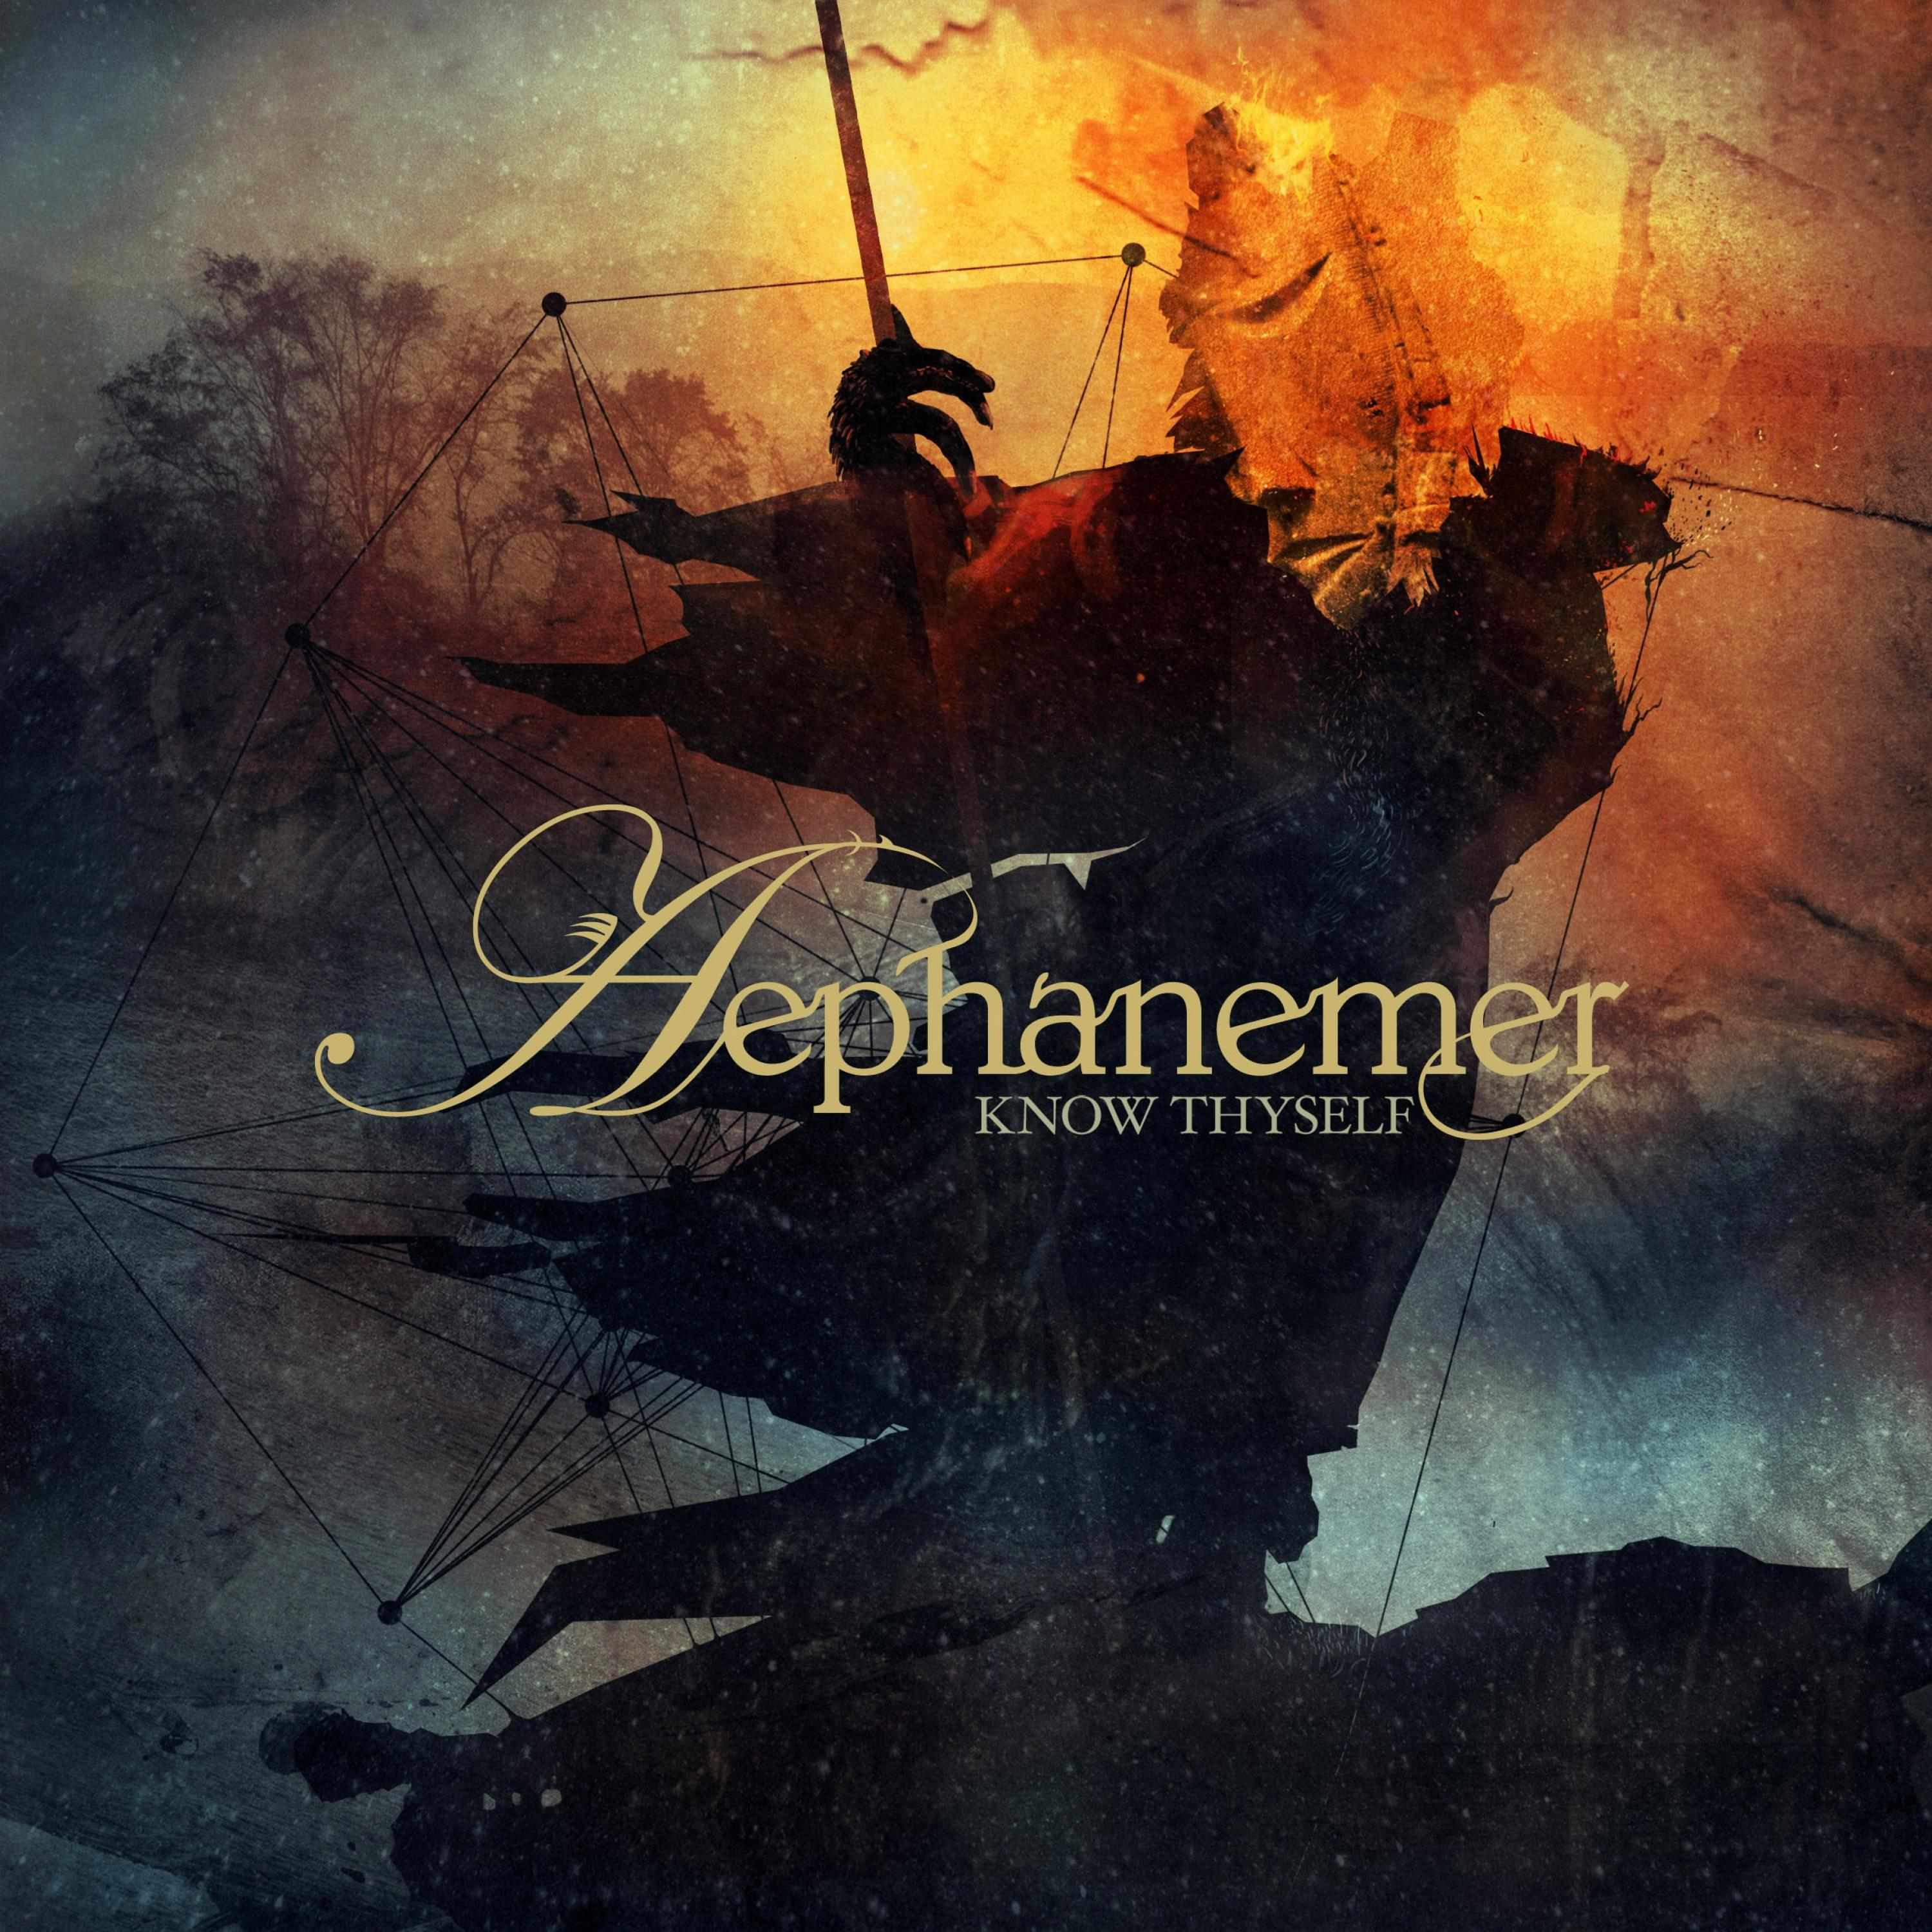

Saved embedded art to: /tmp/tmp1gpmggt4.jpeg


'image/jpeg'

In [ ]:
album_art.show_embedded_art(
    "NeuralForge/songs/Melodic Death Metal/Aephanemer - Path of the Wolf.mp3"
)